In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df=pd.read_csv("/content/Netflix Dataset.csv")

In [4]:
# Displaying the first few rows
display(df.head())

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
# Getting information about the DataFrame
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


None

In [6]:
# Checking for missing values
display(df.isnull().sum())

,0
Show_Id,0
Category,0
Title,0
Director,2388
Cast,718
Country,507
Release_Date,10
Rating,7
Duration,0
Type,0


In [7]:
# Exploring unique values in the 'Category' column as an example
display(df['Category'].unique())

array(['TV Show', 'Movie'], dtype=object)

In [23]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7701 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


None

In [24]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7701 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


None

In [25]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_columns = df.select_dtypes(include='object').columns.tolist()

print("Numeric columns:", numeric_columns)
print("Categorical columns:", categorical_columns)

Numeric columns: []
Categorical columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Rating', 'Duration', 'Type', 'Description']


**Reasoning**:
Iterate through numeric columns and fill missing values with the median.



In [26]:
for col in numeric_columns:
  median_value = df[col].median()
  df[col].fillna(median_value, inplace=True)

**Reasoning**:
Display the info of the dataframe to verify that the missing values in numeric columns are filled.



In [14]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Show_Id           7789 non-null   object        
 1   Category          7789 non-null   object        
 2   Title             7789 non-null   object        
 3   Director          5401 non-null   object        
 4   Cast              7071 non-null   object        
 5   Country           7282 non-null   object        
 6   Release_Date      7691 non-null   datetime64[ns]
 7   Rating            7782 non-null   object        
 8   Duration          7789 non-null   object        
 9   Type              7789 non-null   object        
 10  Description       7789 non-null   object        
 11  Duration_numeric  7789 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.3+ KB


None

**Reasoning**:
Fill missing values in the categorical columns with the mode of each column.



In [27]:
for col in categorical_columns:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

display(df.isnull().sum())

/tmp/ipython-input-3080505031.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,88
Rating,0
Duration,0
Type,0


**Reasoning**:
Check for any remaining missing values to ensure the imputation was successful.



In [28]:
display(df.isnull().sum())

,0
Show_Id,0
Category,0
Title,0
Director,0
Cast,0
Country,0
Release_Date,88
Rating,0
Duration,0
Type,0


In [29]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      7789 non-null   object        
 4   Cast          7789 non-null   object        
 5   Country       7789 non-null   object        
 6   Release_Date  7701 non-null   datetime64[ns]
 7   Rating        7789 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


None

In [31]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      7789 non-null   object        
 4   Cast          7789 non-null   object        
 5   Country       7789 non-null   object        
 6   Release_Date  7789 non-null   datetime64[ns]
 7   Rating        7789 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB


None

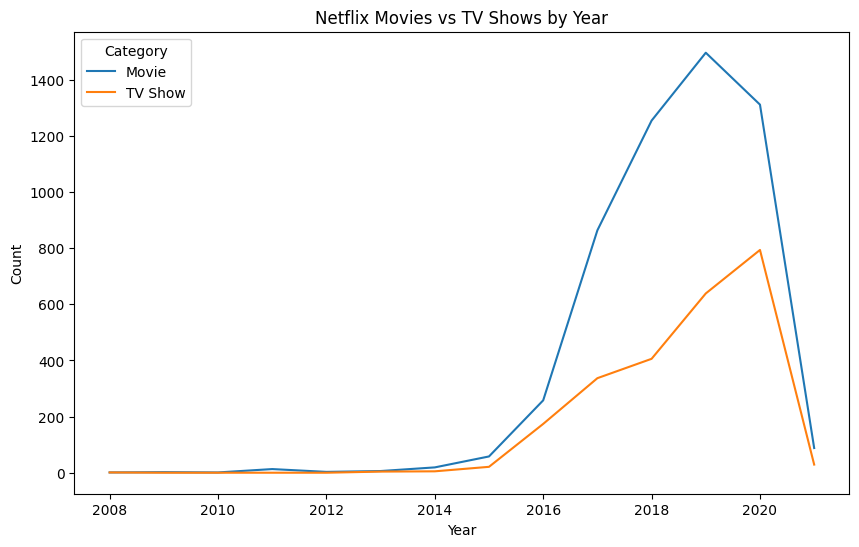

In [35]:
# 1. Movie vs TV Show Distribution Over Years
df['release_year'] = df['Release_Date'].dt.year
movies_tv_trend = df.groupby(['Category', 'release_year']).size().unstack('Category', fill_value=0)
movies_tv_trend.plot(kind='line', figsize=(10,6))
plt.title('Netflix Movies vs TV Shows by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

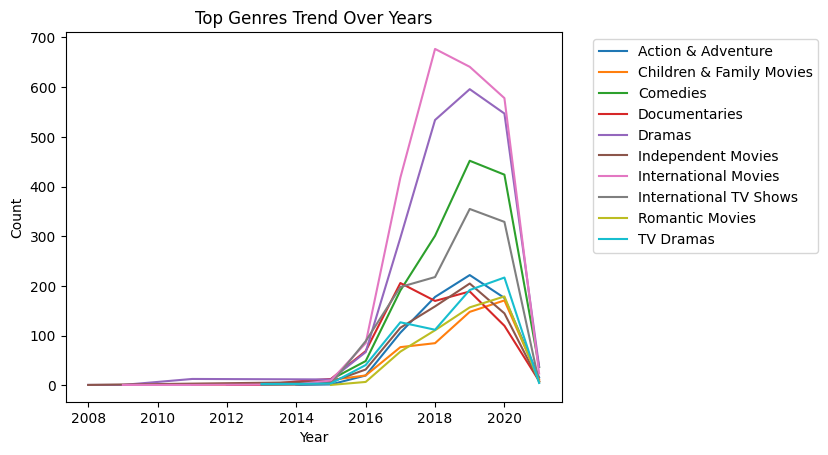

In [42]:
genre_counts = df['Type'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
genre_counts = genre_counts.to_frame(name='genre')
genre_counts = genre_counts.merge(df[['Show_Id', 'release_year']], left_index=True, right_index=True)
genre_counts = genre_counts.groupby(['genre', 'release_year']).size().reset_index(name='count')

top_genres = genre_counts.groupby('genre')['count'].sum().sort_values(ascending=False).head(10).index
sns.lineplot(data=genre_counts[genre_counts['genre'].isin(top_genres)], x='release_year', y='count', hue='genre')
plt.title('Top Genres Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

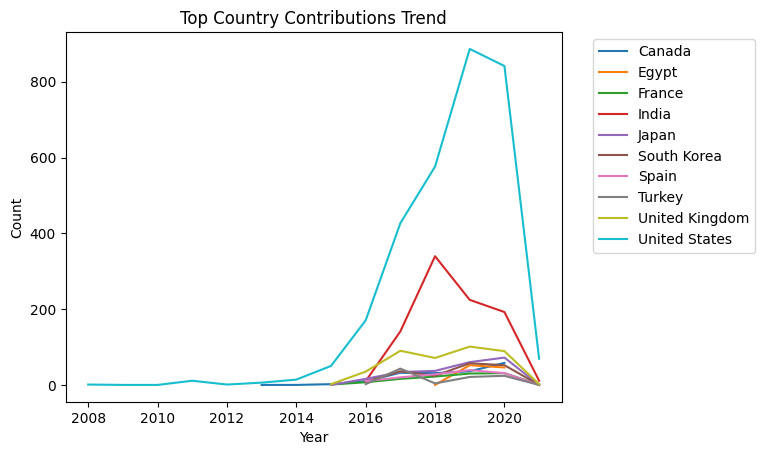

In [43]:
country_counts = df.groupby(['Country', 'release_year']).size().reset_index(name='count')
top_countries = country_counts.groupby('Country')['count'].sum().sort_values(ascending=False).head(10).index
sns.lineplot(data=country_counts[country_counts['Country'].isin(top_countries)], x='release_year', y='count', hue='Country')
plt.title('Top Country Contributions Trend')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [41]:
print("Content strengths:")
print(df['type'].value_counts())
print("Audience preferences - Top genres:")
print(df['genre'].value_counts().head(10))
print("Global reach - Country contributions:")
print(df['country'].value_counts().head(10))

Content strengths:
Category
Movie      5377
TV Show    2410
Name: count, dtype: int64
Audience preferences - Top genres:
International Movies        2437
Dramas                      2106
Comedies                    1471
International TV Shows      1199
Documentaries                786
Action & Adventure           721
TV Dramas                    704
Independent Movies           673
Children & Family Movies     532
Romantic Movies              531
Name: count, dtype: int64
Global reach - Country contributions:
Country
United States     3062
India              923
United Kingdom     397
Japan              226
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Turkey             100
Name: count, dtype: int64
